# Dataset of hand-written digits

In [54]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
import scipy.io

In [56]:
data = scipy.io.loadmat('ex3data.mat')
x = pd.DataFrame(data['X'])
y = pd.DataFrame(data['y'])
y.columns=['y']
data = pd.concat([x,y],axis=1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


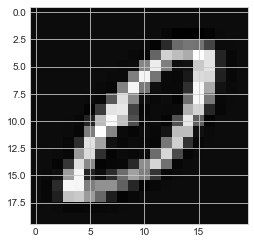

In [57]:
plt.imshow(x.iloc[101].reshape(20,20),cmap='gist_gray')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

# K Nearest Neighbors

In [59]:
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[126   0   0   0   0   0   0   0   0   0]
 [ 14 131   3   1   1   1   3   4   0   2]
 [  7   1 127   0   6   1   1   3   6   0]
 [  6   1   0 125   0   2   0   0  13   0]
 [  3   0   6   0 132   4   0   1   3   2]
 [  1   0   0   2   2 138   0   0   0   0]
 [  9   1   0   4   0   0 134   0   7   0]
 [  8   1  10   0   4   0   1 122   8   1]
 [  1   0   0   0   1   1   1   0 139   0]
 [  0   0   0   0   2   4   1   1   0 160]]


             precision    recall  f1-score   support

          1       0.72      1.00      0.84       126
          2       0.97      0.82      0.89       160
          3       0.87      0.84      0.85       152
          4       0.95      0.85      0.90       147
          5       0.89      0.87      0.88       151
          6       0.91      0.97      0.94       143
          7       0.95      0.86      0.91       155
          8       0.93      0.79      0.85       155
          9       0.79      0.97      0.87       143
         10       0.97      0.95    

# Decision Tree

In [60]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[113   1   1   4   1   2   3   0   1   0]
 [  4 100   6   6   7   6   4  12   4  11]
 [  1  15  89   3  17   2   4   9  10   2]
 [  3   7   4 109   5   5   3   4   7   0]
 [  0   5  11   3 107   5   4   8   5   3]
 [  2   8   2   4   3 115   2   3   2   2]
 [  4   8   7   2   0   1 125   1   6   1]
 [  5   8   7   4   8   4   7 105   7   0]
 [  0   2   2   3   4   1   3   4 124   0]
 [  0   5   2   0   1   2   1   1   0 156]]


             precision    recall  f1-score   support

          1       0.86      0.90      0.88       126
          2       0.63      0.62      0.63       160
          3       0.68      0.59      0.63       152
          4       0.79      0.74      0.76       147
          5       0.70      0.71      0.70       151
          6       0.80      0.80      0.80       143
          7       0.80      0.81      0.80       155
          8       0.71      0.68      0.70       155
          9       0.75      0.87      0.80       143
         10       0.89      0.93    

# Random Forest

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[120   3   0   0   0   1   1   1   0   0]
 [  1 150   1   0   3   1   2   1   0   1]
 [  2  11 126   0   4   1   1   4   3   0]
 [  1   1   0 129   2   5   0   1   7   1]
 [  0   1  15   0 127   1   1   3   2   1]
 [  0   4   0   1   1 133   0   3   1   0]
 [  4   1   1   7   0   0 136   0   5   1]
 [  4   5  10   3   6   3   0 121   2   1]
 [  2   1   1   8   3   0   0   0 126   2]
 [  0   2   1   0   2   3   0   4   0 156]]


             precision    recall  f1-score   support

          1       0.90      0.95      0.92       126
          2       0.84      0.94      0.88       160
          3       0.81      0.83      0.82       152
          4       0.87      0.88      0.87       147
          5       0.86      0.84      0.85       151
          6       0.90      0.93      0.91       143
          7       0.96      0.88      0.92       155
          8       0.88      0.78      0.83       155
          9       0.86      0.88      0.87       143
         10       0.96      0.93    